# MC vs signal peak of data
*(not used in the report because the $_s$Weights don't look good)*

Goal: Compare the MC BDT distribution and the sWeighted BDT distribution

In [1]:
BDT_name = 'gradient'
data_name = 'common_B0TODst3pi_Dst_constr_sWeights_BDT'
branch_constr = 'Dst_constr_B0_M'

In [2]:
from bd2dst3pi.locations import loc
from bd2dst3pi.definition import years, magnets
from bd2dst3pi.pandas_root import load_data, add_constr_Dst

import sys
sys.path.append(loc.ROOT + 'library/')

from HEA.plot import plot_hist_auto, plot_hist
import HEA.plot.tools as pt
from HEA.pandas_root import load_saved_root

Welcome to JupyROOT 6.22/02


## Load the BDT output to the `MC` data and the `common` data

In [3]:
df = {}

In [9]:
df['common'] = load_saved_root(data_name, folder_name='common', vars=['tau_M', 'BDT', 'Dst_constr_B0_M', 'sWeight'])

Loading /afs/cern.ch/user/c/correian/bd2dst3pi/output//root/common/common_B0TODst3pi_Dst_constr_sWeights_BDT.root


In [10]:
df['MC_BDT'] = load_saved_root('MC_'+BDT_name, folder_name='MC')

Loading /afs/cern.ch/user/c/correian/bd2dst3pi/output//root/MC/MC_gradient.root


### BDT output

Figure saved in /afs/cern.ch/user/c/correian/bd2dst3pi/output/plots//data/BDT_data


(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='BDT', ylabel='Candidates / (0.187)'>)

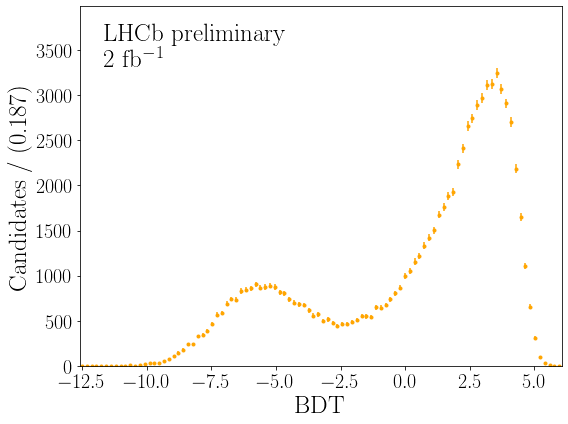

In [11]:
plot_hist_auto({'data': df['common'].query(f'{branch_constr} > 5150 and {branch_constr} < 5570')},'BDT',
              n_bins = 100, bar_mode = False, colors=['orange'], pos_text_LHC=[0.05,0.95,'left'])

## $_s$Weighted distributions of $m(3\pi)$ and $BDT$ (consistency check)

### $m(3\pi)$

/afs/cern.ch/user/c/correian/bd2dst3pi/library/HEA/plot/histogram.py:84: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(counts)


Figure saved in /afs/cern.ch/user/c/correian/bd2dst3pi/output/plots//common_B0TODst3pi_Dst_constr_sWeights_BDT/tau_M_common_B0TODst3pi_Dst_constr_sWeights_BDT


(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='$m$($3\\pi$) [MeV/$c^2$]', ylabel='Candidates / (152 MeV/$c^2$)'>)

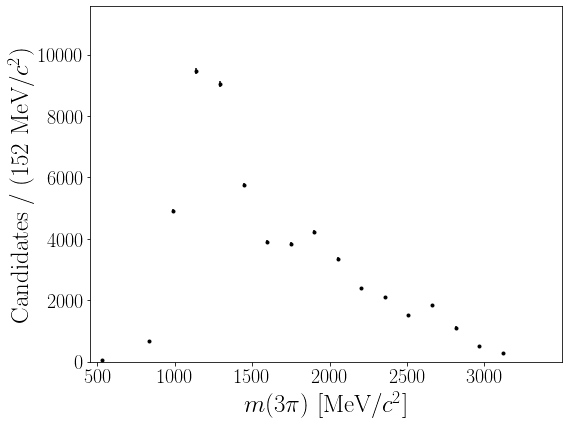

In [12]:
plot_hist_auto({data_name:df['common']}, 'tau_M',
          n_bins=20, bar_mode=False, colors='black', weights=df['common']['sWeight'])

### BDT distribution

/afs/cern.ch/user/c/correian/bd2dst3pi/library/HEA/plot/histogram.py:84: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(counts)


Figure saved in /afs/cern.ch/user/c/correian/bd2dst3pi/output/plots//common_B0TODst3pi_Dst_constr_sWeights_BDT/BDT_common_B0TODst3pi_Dst_constr_sWeights_BDT


(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='BDT', ylabel='Candidates / (0.622)'>)

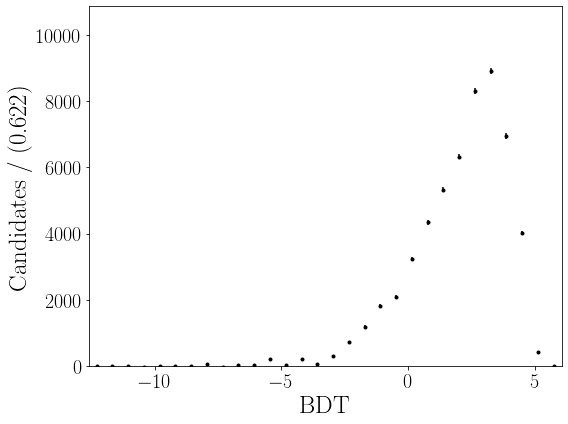

In [13]:
plot_hist_auto({data_name:df['common']}, 'BDT',
          n_bins=30, bar_mode=False, colors='black', weights=df['common']['sWeight'])

/afs/cern.ch/user/c/correian/bd2dst3pi/library/HEA/plot/histogram.py:84: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(counts)
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


Figure saved in /afs/cern.ch/user/c/correian/bd2dst3pi/output/plots//LHCb_data_Signal_peak_of_the_LHCb_data/BDT_LHCb_data_Signal_peak_of_the_LHCb_data


(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='BDT', ylabel='Candidates / (0.622)'>)

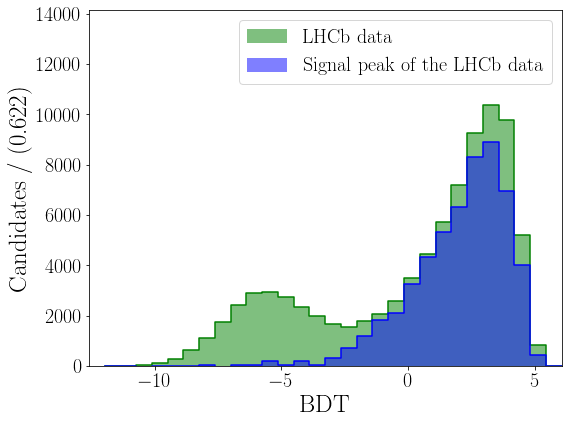

In [14]:
plot_hist_auto({'LHCb data':df['common'], 'Signal peak of the LHCb data':df['common']}, 'BDT',
          n_bins=30, bar_mode=True, colors=['g', 'b'], weights=[None,df['common']['sWeight']],
                    density=False, show_ncounts=False)

## BDT distribution of the $_s$Weighted `common` data vs `MC` data

/afs/cern.ch/user/c/correian/bd2dst3pi/library/HEA/plot/histogram.py:84: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(counts)


Figure saved in /afs/cern.ch/user/c/correian/bd2dst3pi/output/plots//MC_data_Signal_peak_of_the_LHCb_data/BDT_MC_data_Signal_peak_of_the_LHCb_data


(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='BDT', ylabel='Proportion of candidates / (0.622)'>)

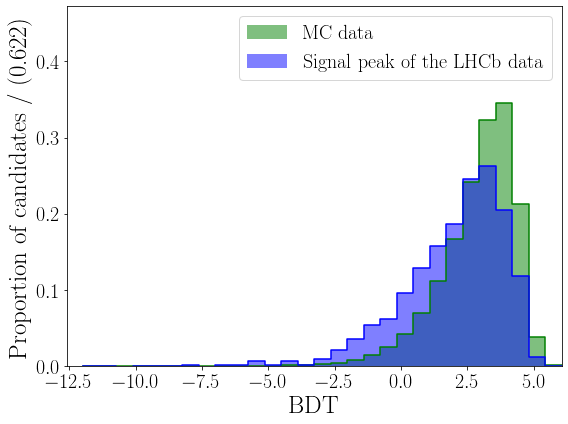

In [15]:
plot_hist_auto({'MC data':df['MC_BDT'], 'Signal peak of the LHCb data':df['common']}, 'BDT',
          n_bins=30, bar_mode=True, colors=['g', 'b'], weights=[None,df['common']['sWeight']],
                    show_ncounts=False)